<a href="https://colab.research.google.com/github/HarshiniAiyyer/ForeXplorer/blob/main/ForeXplorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1: Initial Setup


In [1]:
!pip install -q opendatasets
!pip install -q neo4j-driver
!pip install -q py2neo
!pip install -q networkx spektral

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.1/216.1 kB 7.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 7.2 MB/s eta 0:00:00


import opendatasets as od
od.download('https://www.kaggle.com/datasets/dhruvildave/currency-exchange-rates')

In [2]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/dhruvildave/currency-exchange-rates')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: harshiniayyer
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dhruvildave/currency-exchange-rates


100%|██████████| 16.8M/16.8M [00:00<00:00, 71.3MB/s]


username : harshiniaiyyer
pwd: db9694435b6d0b386a9c18289bb0f443

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/currency-exchange-rates/forex.csv')
df.head()

,slug,date,open,high,low,close,currency
0,GBP/EGP,2001-04-10,5.58090,5.5947,5.5947,5.5947,EGP
1,GBP/EGP,2001-06-04,5.47517,5.4939,5.4939,5.4939,EGP
2,GBP/EGP,2001-08-01,5.67990,5.6543,5.6543,5.6543,EGP
3,GBP/EGP,2002-07-29,7.21700,7.2170,7.2170,7.2170,EGP
4,GBP/EGP,2003-01-02,7.42429,7.3899,7.3899,7.3899,EGP


In [5]:
import pandas as pd

# Assuming 'df' is your original DataFrame
df_shuffled = df.sample(frac=1, random_state=42)  # Shuffle the DataFrame
df = df_shuffled.iloc[:100000]  # Retain only the first 1 lakh rows

# Display the subset or save it as needed
df.head()

,slug,date,open,high,low,close,currency
1211510,INR/KRW,2017-05-15,17.061001,17.533001,17.061001,17.466999,KRW
1333303,GBP/JOD,2018-10-09,0.925640,0.928700,0.920800,0.925530,JOD
372938,EUR/BAM,2004-05-13,1.950400,1.950400,1.950400,1.950400,BAM
367046,GBP/TRY,2017-01-19,4.666400,4.728350,4.653700,4.666090,TRY
597165,USD/NZD,2012-03-02,1.191800,1.202300,1.190600,1.192600,NZD


In [6]:
# Extract the part after the slash and store it in a new column
df['slug1'] = df['slug'].str.split('/').str[0]
df['slug2'] = df['slug'].str.split('/').str[1]
df['close'] = np.log(df['close'])
df.head()

<ipython-input-6-92efc9b32512>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['slug1'] = df['slug'].str.split('/').str[0]
<ipython-input-6-92efc9b32512>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['slug2'] = df['slug'].str.split('/').str[1]
<ipython-input-6-92efc9b32512>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,slug,date,open,high,low,close,currency,slug1,slug2
1211510,INR/KRW,2017-05-15,17.061001,17.533001,17.061001,2.860313,KRW,INR,KRW
1333303,GBP/JOD,2018-10-09,0.925640,0.928700,0.920800,-0.077389,JOD,GBP,JOD
372938,EUR/BAM,2004-05-13,1.950400,1.950400,1.950400,0.668034,BAM,EUR,BAM
367046,GBP/TRY,2017-01-19,4.666400,4.728350,4.653700,1.540321,TRY,GBP,TRY
597165,USD/NZD,2012-03-02,1.191800,1.202300,1.190600,0.176136,NZD,USD,NZD


In [7]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1211510 to 824705
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   slug      100000 non-null  object        
 1   date      100000 non-null  datetime64[ns]
 2   open      100000 non-null  float64       
 3   high      100000 non-null  float64       
 4   low       100000 non-null  float64       
 5   close     100000 non-null  float64       
 6   currency  100000 non-null  object        
 7   slug1     100000 non-null  object        
 8   slug2     100000 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 9.6+ MB


<ipython-input-7-768671ade27e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [8]:
# Sort the DataFrame by 'slug1' and 'date'
df_sorted = df.sort_values(by=['slug', 'date'], ascending=[True, False])

# Drop duplicates to keep only the latest date for each 'slug1'
df1 = df_sorted.drop_duplicates(subset=['slug'], keep='first')

# Reset the index
df1 = df1.reset_index(drop=True)

df1['date'] = pd.to_datetime(df1['date'])

df1.head()

,slug,date,open,high,low,close,currency,slug1,slug2
0,AUD/ARS,2021-08-30,71.217697,71.370697,71.127098,4.266570,ARS,AUD,ARS
1,AUD/BRL,2021-08-30,3.839100,3.846200,3.779300,1.329645,BRL,AUD,BRL
2,AUD/CAD,2021-08-12,0.921909,0.922113,0.917520,-0.081416,CAD,AUD,CAD
3,AUD/CHF,2021-08-27,0.664137,0.667405,0.662600,-0.408841,CHF,AUD,CHF
4,AUD/CNY,2021-08-16,4.716135,4.748761,4.716135,1.561621,CNY,AUD,CNY


df2.to_csv('fx_data.csv', sep='\t', encoding='utf-8')

## Part 2: Neo4j Connection

In [ ]:
from py2neo import Graph
import pandas as pd

# Neo4j connection
graph = Graph("bolt://3.82.100.250:7687",
  auth = ("neo4j", "veteran-webs-capital"))

In [ ]:
# Iterate through the DataFrame and create nodes and relationships
for index, row in df.iterrows():
    query = """
    MERGE (s:Node {name: $slug1})
    MERGE (t:Node {name: $slug2})
    MERGE (s)-[r: REL{cost:$close}]->(t)
    RETURN s.name AS slug1, t.name AS slug2
    """
    result = graph.run(query, slug1=row['slug1'], slug2=row['slug2'], close = row['close'])


KeyboardInterrupt: 



```
# # Initialize an empty list to store the results
all_data = []

# Iterate through the DataFrame and create nodes and relationships
for index, row in df.iterrows():
    query = """
    MERGE (s:Currency {name: $slug1})
    MERGE (t:Currency {name: $slug2})
    MERGE (s)-[:CONNECTED_TO]->(t)
    RETURN s.name AS slug1, t.name AS slug2
    """
    result = graph.run(query, slug1=row['slug1'], slug2=row['slug2'])
    # Convert the result to a list of dictionaries and append it to the all_data list
    data = list(result.data())
    all_data.extend(data)  # Use extend to merge the list from each iteration

# Now, all_data will contain the combined results from all iterations
print(all_data)
```






```
# # Sort the DataFrame by 'slug1' and 'date'
df_sorted = df.sort_values(by=['slug1', 'date'], ascending=[True, False])

# Drop duplicates to keep only the latest date for each 'slug1'
df1 = df_sorted.drop_duplicates(subset=['slug1'], keep='first')

# Reset the index
df1 = df1.reset_index(drop=True)

df1.head()
```






In [ ]:
df2 = df1[['slug1','slug2','close']]
df2.head()

,slug1,slug2,close
0,AUD,ARS,4.266570
1,AUD,BRL,1.329645
2,AUD,CAD,-0.081416
3,AUD,CHF,-0.408841
4,AUD,CNY,1.561621


In [ ]:
df2['slug1'].value_counts()

,count
slug1,
GBP,94
USD,81
EUR,72
CHF,28
AUD,27
JPY,22
INR,16


## Part 3: Bellman Ford Algorithm

#### Plotting network graph

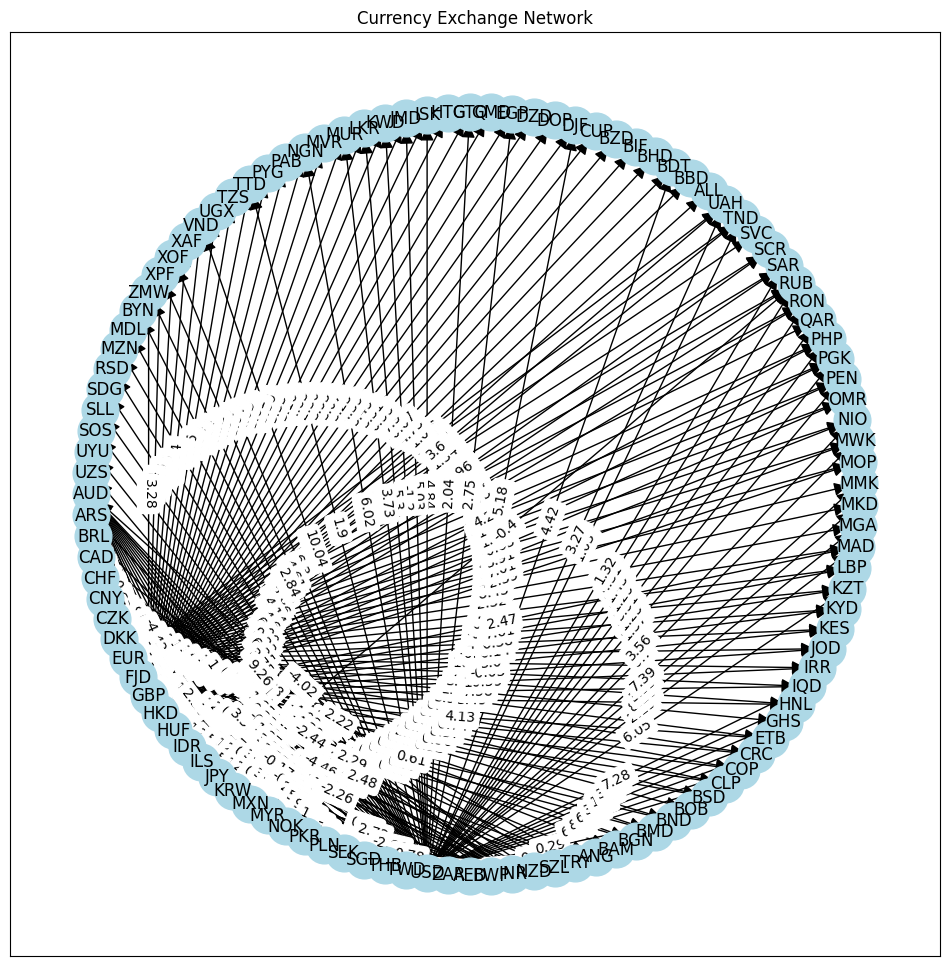

In [ ]:
import networkx as nx

G = nx.DiGraph()

for i,j in df2.iterrows():
  G.add_edge(j['slug1'], j['slug2'], weight=round(j['close'],2))

pos = nx.shell_layout(G)
plt.figure(figsize=(12, 12))

# Draw nodes with labels
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=12)

# Draw edges with weights (close values)
edges = nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display the graph
plt.title("Currency Exchange Network")
plt.show()

### Making the Bellman Ford Algorithm


In [ ]:
import numpy as np
import networkx as nx

def bellman_ford_detect_negative_cycle(G, source):
    # Initialize distances and predecessors
    dist = {node: np.inf for node in G.nodes}
    dist[source] = 0
    prev = {node: None for node in G.nodes}

    # Relax edges |V| - 1 times
    for _ in range(len(G.nodes) - 1):
        for u, v, data in G.edges(data=True):
            weight = data['weight']
            if dist[u] + weight < dist[v]:
                dist[v] = dist[u] + weight
                prev[v] = u

    # Check for negative-weight cycles
    for u, v, data in G.edges(data=True):
        weight = data['weight']
        if dist[u] + weight < dist[v]:
            print("Arbitrage opportunity detected: Negative weight cycle exists.")

            # Reconstruct the negative cycle
            cycle = []
            # Track the cycle start node
            for _ in range(len(G.nodes)):
                v = u
                u = prev[u]
            cycle_start = v
            while True:
                cycle.append(cycle_start)
                cycle_start = prev[cycle_start]
                if cycle_start in cycle:
                    break
            cycle.append(cycle_start)
            cycle.reverse()
            print("Negative cycle found:", cycle)
            return True

    return False


### Testing

In [ ]:
# Run Bellman-Ford to detect negative cycle
has_arbitrage = bellman_ford_detect_negative_cycle(G, 'AUD')

if has_arbitrage:
    print("Arbitrage opportunity found!")
else:
    print("No arbitrage opportunity.")

Arbitrage opportunity detected: Negative weight cycle exists.
Negative cycle found: ['INR', 'USD', 'INR']
Arbitrage opportunity found!


#START HERE

### Setting up the graph

This project uses Python and Neo4j to identify arbitrage opportunities in forex exchanges through pathfinding algorithms.

In [9]:
import networkx as nx

g = nx.DiGraph()

for i,j in df1.iterrows():
  g.add_edge(j['slug1'], j['slug2'], weight=round(j['close'],2))

#graph info
print(f"Number of nodes: {g.number_of_nodes()}")
print(f"Number of edges: {g.number_of_edges()}")
print(f"Nodes: {list(g.nodes)}")
print(f"Edges: {list(g.edges(data=True))}")

Number of nodes: 113
Number of edges: 340
Nodes: ['AUD', 'ARS', 'BRL', 'CAD', 'CHF', 'CNY', 'CZK', 'DKK', 'EUR', 'FJD', 'GBP', 'HKD', 'HUF', 'IDR', 'ILS', 'JPY', 'KRW', 'MXN', 'MYR', 'NOK', 'PKR', 'PLN', 'SEK', 'SGD', 'THB', 'TWD', 'USD', 'ZAR', 'AED', 'BWP', 'INR', 'NZD', 'SZL', 'TRY', 'ANG', 'BAM', 'BGN', 'BMD', 'BND', 'BOB', 'BSD', 'CLP', 'COP', 'CRC', 'ETB', 'GHS', 'HNL', 'IQD', 'IRR', 'JOD', 'KES', 'KYD', 'KZT', 'LBP', 'MAD', 'MGA', 'MKD', 'MMK', 'MOP', 'MWK', 'NIO', 'OMR', 'PEN', 'PGK', 'PHP', 'QAR', 'RON', 'RUB', 'SAR', 'SCR', 'SVC', 'TND', 'UAH', 'ALL', 'BBD', 'BDT', 'BHD', 'BIF', 'BZD', 'CUP', 'DJF', 'DOP', 'DZD', 'EGP', 'GMD', 'GTQ', 'HTG', 'ISK', 'JMD', 'KWD', 'LKR', 'MUR', 'MVR', 'NGN', 'PAB', 'PYG', 'TTD', 'TZS', 'UGX', 'VND', 'XAF', 'XOF', 'XPF', 'ZMW', 'BYN', 'MDL', 'MZN', 'RSD', 'SDG', 'SLL', 'SOS', 'UYU', 'UZS']
Edges: [('AUD', 'ARS', {'weight': 4.27}), ('AUD', 'BRL', {'weight': 1.33}), ('AUD', 'CAD', {'weight': -0.08}), ('AUD', 'CHF', {'weight': -0.41}), ('AUD', 'CNY'

### Checking for self loops

In [10]:
self_loops = list(nx.selfloop_edges(g))
if self_loops:
    print(f"Self-loops found: {self_loops}")

None.

### Analyze graph properties

In [11]:
in_degrees = dict(g.in_degree())
out_degrees = dict(g.out_degree())
print(f"In-degrees: {in_degrees}")
print(f"Out-degrees: {out_degrees}")

strongly_connected_components = list(nx.strongly_connected_components(g))
print(f"Strongly connected components: {strongly_connected_components}")

In-degrees: {'AUD': 6, 'ARS': 5, 'BRL': 6, 'CAD': 7, 'CHF': 6, 'CNY': 7, 'CZK': 6, 'DKK': 5, 'EUR': 6, 'FJD': 3, 'GBP': 6, 'HKD': 7, 'HUF': 5, 'IDR': 6, 'ILS': 6, 'JPY': 6, 'KRW': 6, 'MXN': 5, 'MYR': 7, 'NOK': 6, 'PKR': 6, 'PLN': 6, 'SEK': 5, 'SGD': 5, 'THB': 7, 'TWD': 6, 'USD': 6, 'ZAR': 6, 'AED': 4, 'BWP': 4, 'INR': 5, 'NZD': 5, 'SZL': 4, 'TRY': 4, 'ANG': 1, 'BAM': 1, 'BGN': 3, 'BMD': 2, 'BND': 3, 'BOB': 1, 'BSD': 2, 'CLP': 3, 'COP': 3, 'CRC': 3, 'ETB': 3, 'GHS': 2, 'HNL': 3, 'IQD': 3, 'IRR': 2, 'JOD': 2, 'KES': 2, 'KYD': 2, 'KZT': 3, 'LBP': 2, 'MAD': 3, 'MGA': 2, 'MKD': 2, 'MMK': 2, 'MOP': 2, 'MWK': 3, 'NIO': 3, 'OMR': 2, 'PEN': 3, 'PGK': 3, 'PHP': 3, 'QAR': 2, 'RON': 3, 'RUB': 4, 'SAR': 3, 'SCR': 2, 'SVC': 1, 'TND': 3, 'UAH': 3, 'ALL': 1, 'BBD': 1, 'BDT': 2, 'BHD': 1, 'BIF': 1, 'BZD': 1, 'CUP': 1, 'DJF': 2, 'DOP': 1, 'DZD': 1, 'EGP': 2, 'GMD': 1, 'GTQ': 2, 'HTG': 1, 'ISK': 2, 'JMD': 2, 'KWD': 2, 'LKR': 2, 'MUR': 2, 'MVR': 1, 'NGN': 2, 'PAB': 1, 'PYG': 1, 'TTD': 2, 'TZS': 1, 'UGX': 

### Centrality measures

In [12]:
import networkx as nx

# Centrality measures
degree_centrality = nx.degree_centrality(g)
betweenness_centrality = nx.betweenness_centrality(g)
closeness_centrality = nx.closeness_centrality(g)
eigenvector_centrality = nx.eigenvector_centrality(g)

print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Eigenvector Centrality:", eigenvector_centrality)


Degree Centrality: {'AUD': 0.29464285714285715, 'ARS': 0.04464285714285714, 'BRL': 0.05357142857142857, 'CAD': 0.0625, 'CHF': 0.30357142857142855, 'CNY': 0.0625, 'CZK': 0.05357142857142857, 'DKK': 0.04464285714285714, 'EUR': 0.6964285714285714, 'FJD': 0.026785714285714284, 'GBP': 0.8928571428571428, 'HKD': 0.0625, 'HUF': 0.04464285714285714, 'IDR': 0.05357142857142857, 'ILS': 0.05357142857142857, 'JPY': 0.25, 'KRW': 0.05357142857142857, 'MXN': 0.04464285714285714, 'MYR': 0.0625, 'NOK': 0.05357142857142857, 'PKR': 0.05357142857142857, 'PLN': 0.05357142857142857, 'SEK': 0.04464285714285714, 'SGD': 0.04464285714285714, 'THB': 0.0625, 'TWD': 0.05357142857142857, 'USD': 0.7767857142857142, 'ZAR': 0.05357142857142857, 'AED': 0.03571428571428571, 'BWP': 0.03571428571428571, 'INR': 0.1875, 'NZD': 0.04464285714285714, 'SZL': 0.03571428571428571, 'TRY': 0.03571428571428571, 'ANG': 0.008928571428571428, 'BAM': 0.008928571428571428, 'BGN': 0.026785714285714284, 'BMD': 0.017857142857142856, 'BND': 

### Community detection

In [13]:
from networkx.algorithms.community import girvan_newman

# Apply Girvan-Newman method
comp = girvan_newman(g.to_undirected())
top_level_communities = next(comp)
print("Communities:", list(top_level_communities))

Communities: [{'KES', 'KWD', 'SDG', 'OMR', 'GMD', 'BZD', 'BGN', 'SLL', 'AUD', 'USD', 'CHF', 'BHD', 'DJF', 'BOB', 'PEN', 'ILS', 'MYR', 'PYG', 'SVC', 'HUF', 'EGP', 'CNY', 'BWP', 'MVR', 'XPF', 'UYU', 'PLN', 'CRC', 'IRR', 'LBP', 'MMK', 'MWK', 'AED', 'PHP', 'DKK', 'CUP', 'BIF', 'KZT', 'SAR', 'TTD', 'CAD', 'THB', 'GHS', 'ETB', 'GTQ', 'IQD', 'XAF', 'RUB', 'BMD', 'UZS', 'TND', 'MAD', 'BAM', 'SOS', 'RON', 'JMD', 'SEK', 'MOP', 'BDT', 'ISK', 'BSD', 'DZD', 'NOK', 'ANG', 'PGK', 'LKR', 'NGN', 'SGD', 'MGA', 'CZK', 'HNL', 'SZL', 'QAR', 'VND', 'MXN', 'MDL', 'NZD', 'COP', 'KRW', 'DOP', 'BND', 'MKD', 'ARS', 'UAH', 'TRY', 'INR', 'SCR', 'KYD', 'MUR', 'ZAR', 'ZMW', 'MZN', 'JPY', 'HTG', 'HKD', 'TZS', 'BYN', 'GBP', 'BRL', 'PKR', 'BBD', 'UGX', 'XOF', 'TWD', 'JOD', 'PAB', 'IDR', 'CLP', 'FJD', 'EUR', 'NIO', 'RSD'}, {'ALL'}]
